In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVR, LinearSVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB

In [2]:
def get_models():
	''' Return all different model here.
    Models are along with parameters so any relevant change be easy'''
	models = [
				 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
							max_features=None, max_leaf_nodes=None,
							min_impurity_decrease=0.0, min_impurity_split=None,
							min_samples_leaf=1, min_samples_split=4,
							min_weight_fraction_leaf=0.0, presort=False,
							random_state=None, splitter='best'),

				 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
						   intercept_scaling=1, l1_ratio=None, max_iter=10000,
						   multi_class='warn', n_jobs=None, penalty='l1',
						   random_state=None, solver='saga', tol=0.001, verbose=0,
						   warm_start=True),

				 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
							metric_params=None, n_jobs=None, n_neighbors=5, p=2,
							weights='uniform'),

				 LinearSVR(C=4.0, dual=True, epsilon=0.0, fit_intercept=True,
						intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
						random_state=None, tol=0.00001, verbose=0),\

				 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),\

				 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
						  max_features='auto', max_leaf_nodes=None,
						  min_impurity_decrease=0.0, min_impurity_split=None,
						  min_samples_leaf=1, min_samples_split=2,
						  min_weight_fraction_leaf=0.0, n_estimators=5,
						  n_jobs=None, oob_score=False, random_state=None,
						  verbose=0, warm_start=True),\

				 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
							metric_params=None, n_jobs=None, n_neighbors=2, p=2,
							weights='uniform'),\

				 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
						  max_leaf_nodes=None, min_impurity_decrease=0.0,
						  min_impurity_split=None, min_samples_leaf=1,
						  min_samples_split=2, min_weight_fraction_leaf=0.0,
						  presort=False, random_state=None, splitter='best'),\

				 GaussianNB(priors=None, var_smoothing=1e-06),\

				 Lasso(alpha=1e-15, normalize=True, max_iter=1e4),\

				 SGDClassifier(warm_start=DecisionTreeClassifier),\

				 SVR(C=1.0, cache_size=20, coef0=1.0, degree=5, epsilon=0.2,
					    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
					    tol=0.001, verbose=False),\

				 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
					    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
					    kernel='rbf', max_iter=-1, probability=False, random_state=None,
					    shrinking=True, tol=0.001, verbose=False),\

				 ]

	return models


def get_uncorr_ind(df, lim=0.2):
	'''Calculate correlation matrix and choose columns on its basis'''

	corr_matrix = df.corr()["is_goal"]
	corr_ind_drop = []
	for i in range(len(corr_matrix)):
		if (corr_matrix.values[i] < lim and corr_matrix.values[i] > -lim):
			corr_ind_drop.append(i)

	return corr_ind_drop


def visualization(df):

	data = df
	print("correlation Matrix for is_goal")
	print(df.corr()['is_goal'])
	print("No. of Unique values in different columns")
	print((df.nunique()))

	feat = [ind for ind in (data.columns)]
	for fea in feat[:len(feat)-2]:
		sns.countplot(x=fea, data=data)
		plt.show()

	df_h = df[~(df["is_goal"] == 0)]
	df = data
	df_nh = df[~(df["is_goal"] == 1)]

	sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
	plt.show()

	print('Columns as Features: {}'.format(feat))
	print('Column to predict : {}'.format(feat[8]))

	plt.figure(figsize=(18,18))
	i = 1
	for fea in feat[:len(feat)]:
		if(fea != "is_goal"):
			plt.subplot(5,3,i)
			plt.tight_layout()
			plt.scatter(df_h[fea], df_h["is_goal"], s=3)
			plt.scatter(df_nh[fea], df_nh["is_goal"], s=3, color='red')
			plt.title(fea)
			plt.xlabel(fea)
			plt.ylabel("is_goal")
			i = i + 1
	plt.show()

	plt.figure(figsize=(18,18))
	i = 1
	for fea in feat[:len(feat)-1]:
		plt.subplot(5,3,i)
		plt.tight_layout()
		plt.scatter(df_h[fea], range(len(df_h["is_goal"])), s=3)
		plt.scatter(df_nh[fea], range(len(df_nh["is_goal"])), s=3)
		plt.title(fea)
		plt.xlabel(fea)
		plt.ylabel("Y-Axis")
		i = i + 1
	plt.show()
	

In [3]:
df = pd.read_csv('data.csv', index_col=0)

data = df
print(data.head())

   match_event_id  location_x  location_y  remaining_min  power_of_shot  \
0            10.0       167.0        72.0           10.0            1.0   
1            12.0      -157.0         0.0           10.0            1.0   
2            35.0      -101.0       135.0            7.0            1.0   
3            43.0       138.0       175.0            6.0            1.0   
4           155.0         0.0         0.0            NaN            2.0   

   knockout_match game_season  remaining_sec  distance_of_shot  is_goal  ...  \
0             0.0     2000-01           27.0              38.0      NaN  ...   
1             0.0     2000-01           22.0              35.0      0.0  ...   
2             0.0     2000-01           45.0              36.0      1.0  ...   
3             0.0     2000-01           52.0              42.0      0.0  ...   
4             0.0     2000-01           19.0              20.0      1.0  ...   

                  lat/lng type_of_shot type_of_combined_shot  match_

In [4]:
data['is_goal'].dropna(inplace=True)
data.fillna(method='backfill',inplace=True, axis=0)
data.drop(['team_name', 'date_of_game', 'lat/lng', 'game_season', 'type_of_combined_shot', 'remaining_min.1',\
			'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1', 'team_id', 'match_id','shot_basics'],\
				# 'location_y', 'knockout_match', 'shot_basics', 'range_of_shot', 'area_of_shot', 'power_of_shot'],\
				 inplace=True, axis=1)

sid_number_ = data['shot_id_number']
sid_number = sid_number_[int(len(sid_number_) * 0.5)+1:]

correlation Matrix for is_goal
match_event_id     -0.033872
location_x         -0.002784
location_y         -0.106555
remaining_min       0.024997
power_of_shot      -0.031243
knockout_match      0.000372
remaining_sec       0.023152
distance_of_shot   -0.147167
is_goal             1.000000
shot_id_number     -0.016902
Name: is_goal, dtype: float64
No. of Unique values in different columns
match_event_id        618
location_x            488
location_y            450
remaining_min          12
power_of_shot           7
knockout_match          2
remaining_sec          60
distance_of_shot       73
is_goal                 2
area_of_shot            6
range_of_shot           5
home/away              74
shot_id_number      29134
type_of_shot           57
dtype: int64


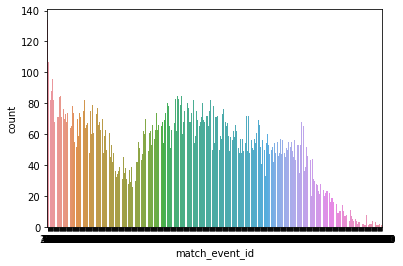

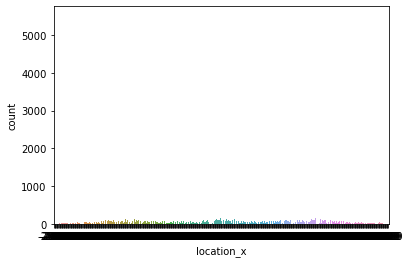

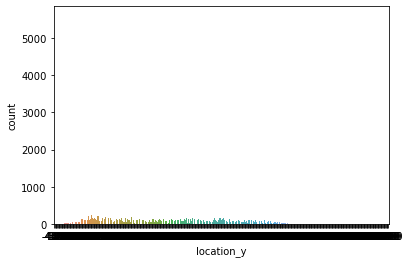

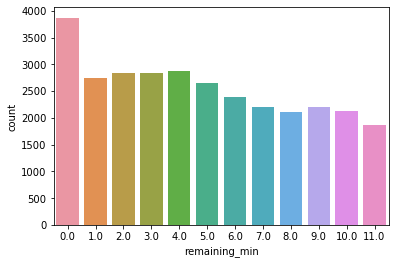

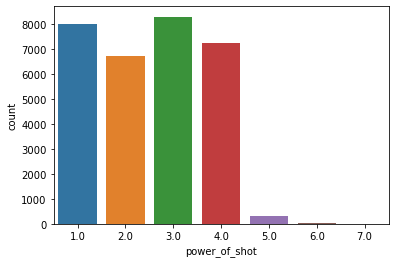

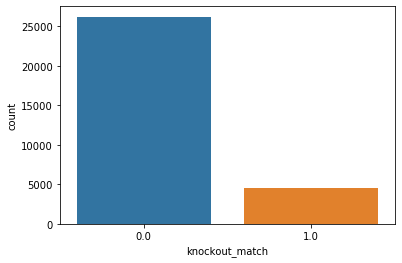

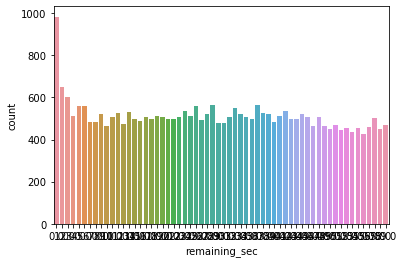

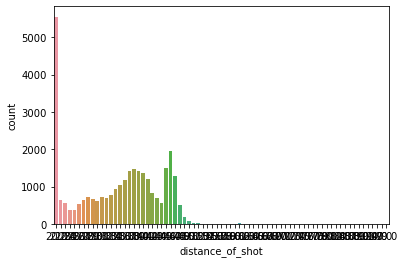

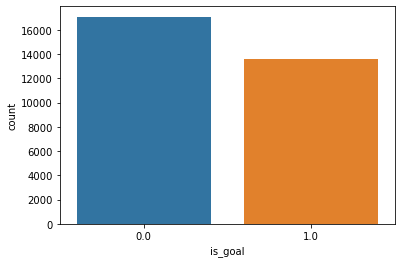

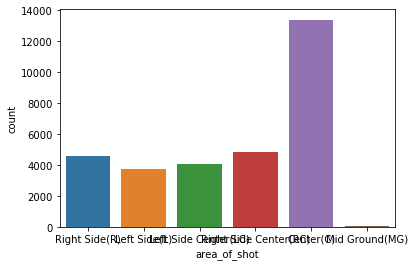

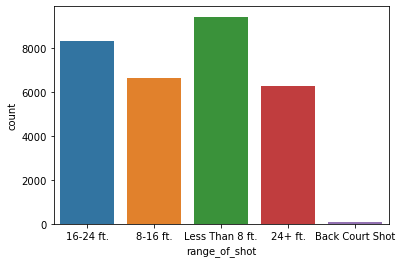

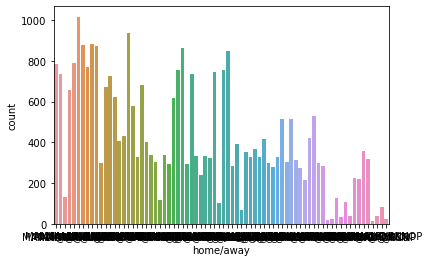

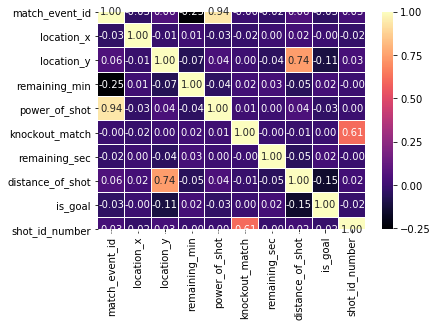

Columns as Features: ['match_event_id', 'location_x', 'location_y', 'remaining_min', 'power_of_shot', 'knockout_match', 'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot', 'range_of_shot', 'home/away', 'shot_id_number', 'type_of_shot']
Column to predict : is_goal


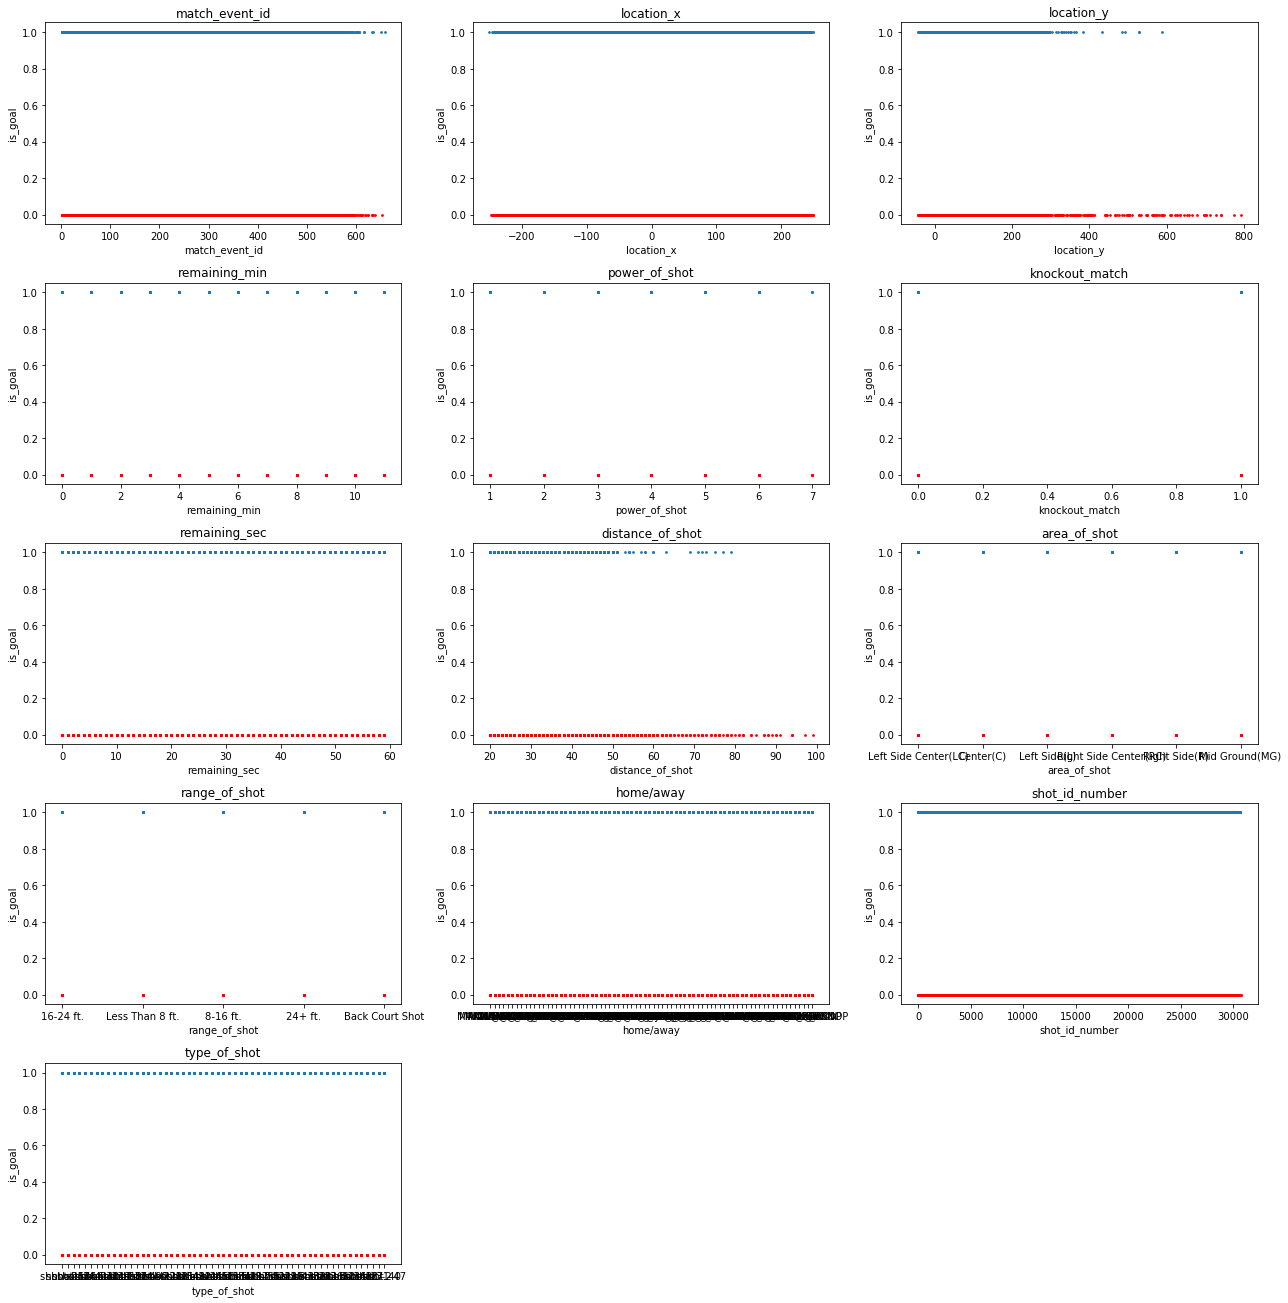

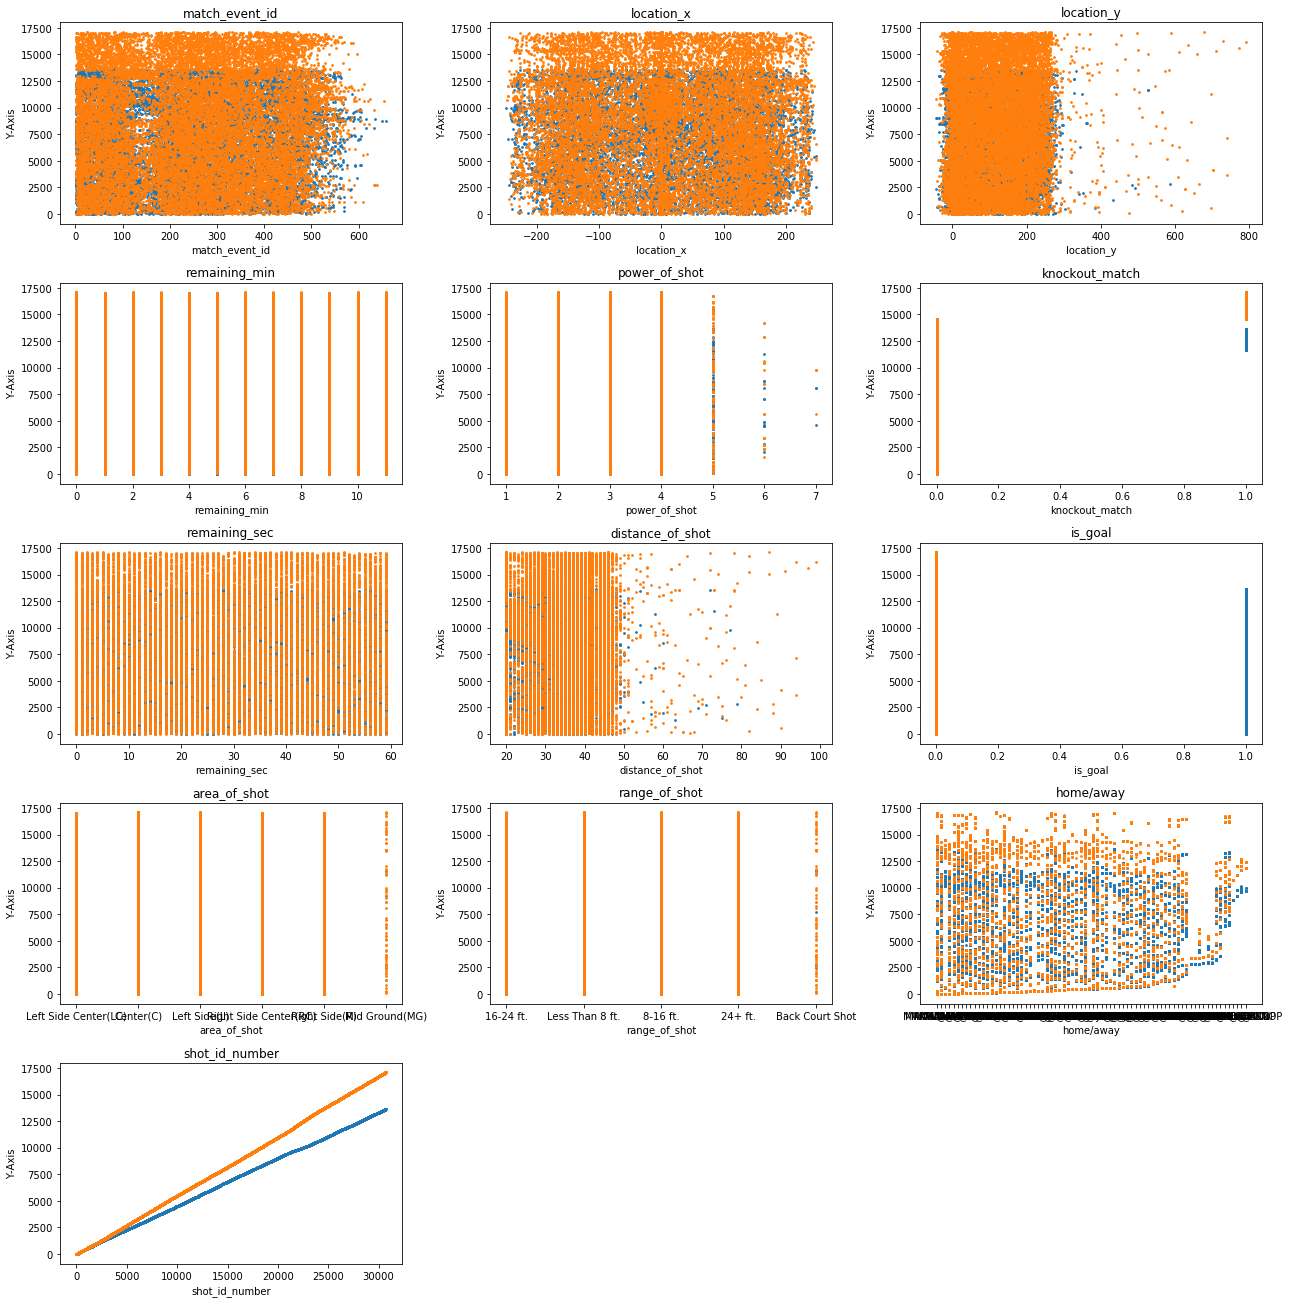

In [5]:
visualization(data)

In [6]:
enco_col = ['area_of_shot', 'range_of_shot', 'type_of_shot', 'home/away']
LE = LabelEncoder()

for col in enco_col:
	LE.fit(data[col].values)
	arr = LE.transform(data[col].values)
	data[col] = pd.DataFrame(arr)
	# print(data[col].head())

In [7]:
# Drop columns with low correlation
lim = 0.1
corr_ind_drop = get_uncorr_ind(data, lim)
print('Index Dropped :')
print(corr_ind_drop)
data.drop(data.columns[corr_ind_drop], inplace=True, axis=1)

Index Dropped :
[0, 1, 3, 4, 5, 6, 9, 11, 12, 13]


In [8]:
data.dropna(inplace=True)

In [9]:
# Get number of independant variables, drop the dependant variable
num_charac = len(data.columns) - 1
Y = data["is_goal"]
data.drop(["is_goal"],axis=1,inplace = True)

In [10]:
# Split dataset into train and test, with randomness
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.5, shuffle=False)

# normalization
scalerX = StandardScaler()
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

In [11]:
# Get differnet Regressive models
models = get_models()

data_2 = data
col_df = []
accu_martix = []
mae_matrix = []

# Fit models
for mod in models:

	model = mod.fit(x_train, y_train)
	y_hat = model.predict(x_test)
	y_hat_ = y_hat

	# Encoding
	for y in range(len(y_hat_)) :
		if(np.abs(y_hat_[y]) < 0.5):
			y_hat[y] = 0
		else:
			y_hat[y] = 1

	maeloss = mean_absolute_error(y_hat, y_test)
	mae_matrix.append(maeloss)

	accu_martix.append(1/(1+maeloss))

	col_df.append(str(mod).split('(')[0])

	
acc_df = pd.DataFrame(data=np.array([accu_martix]), columns=col_df[:])
acc_df = acc_df.T
acc_df.columns = ["Score"]
print(acc_df)

                           Score
DecisionTreeClassifier  0.686496
LogisticRegression      0.707379
KNeighborsClassifier    0.685056
LinearSVR               0.701559
LinearRegression        0.707346
RandomForestRegressor   0.680349
KNeighborsRegressor     0.663238
DecisionTreeRegressor   0.675172
GaussianNB              0.702104
Lasso                   0.707346
SGDClassifier           0.698271
SVR                     0.714658
SVC                     0.714126


In [ ]:
mod = SVR(C=1.0, cache_size=20, coef0=1.0, degree=5, epsilon=0.2,
					    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
					    tol=0.001, verbose=False)
model = mod.fit(x_train, y_train)
y_hat = model.predict(x_test)
y_hat_ = y_hat

# Encoding
for y in range(len(y_hat_)) :
	if(np.abs(y_hat_[y]) < 0.5):
		y_hat[y] = 0
	else:
		y_hat[y] = 1

maeloss = mean_absolute_error(y_hat, y_test)

print('SVR accuracy : %2f'% (1/(1+maeloss)))
submission_df = pd.DataFrame(({'shot_id_number':np.array(sid_number), 'is_goal':y_hat}))
submission_df.to_csv('submission_df.csv')
